## s8(z) LCDM prior

Priors are taken from Plank datas. 

Authors: Erica Longo, Marco Raveri

In [47]:
import sys, platform, os
import pickle
import tqdm
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.2 installed at /Users/marco/Software/anaconda3/lib/python3.7/site-packages/camb


In [94]:
# Initial setup:
number_of_samples = 10
LCDM_priors = {
               'omegabh2': [0.005, 0.1],
               'omegach2': [0.001, 0.99],
               'H0': [40, 100],
               'ns': [0.8, 1.2],
               'logAs': [2, 4],
               }
# redshifts need to be defined from the higher to the lower to respect time order and crosscorrelate correctly
redshifts= np.linspace(3, 0, 20)
cache_file = './LCDM_sigma_8.cache'

In [88]:
# if the cache file exists load it and append, otherwise initialize as empty:
if os.path.isfile(cache_file):
    sigma_8_samples = list(pickle.load(open(cache_file, 'rb')))
else:
    sigma_8_samples = []

# start the loop:
for i in tqdm.tqdm(range(number_of_samples)):
    # generate the sample:
    _omegabh2 = np.random.uniform(LCDM_priors['omegabh2'][0], LCDM_priors['omegabh2'][1], 1)[0]
    _omegach2 = np.random.uniform(LCDM_priors['omegach2'][0], LCDM_priors['omegach2'][1], 1)[0]
    _H0 = np.random.uniform(LCDM_priors['H0'][0], LCDM_priors['H0'][1], 1)[0]
    _ns = np.random.uniform(LCDM_priors['ns'][0], LCDM_priors['ns'][1], 1)[0]
    _logAs = np.random.uniform(LCDM_priors['logAs'][0], LCDM_priors['logAs'][1], 1)[0]
    # process parameters to feed to CAMB:
    # note: As need to be defined so in Camb (exp_)
    _As = 10**(-10)*np.exp(_logAs)
    # set up camb:
    pars = camb.set_params(H0=_H0, ombh2=_omegabh2, omch2=_omegach2, As=_As, ns=_ns)
    pars.set_matter_power(redshifts, kmax=2.0)
    pars.NonLinear = model.NonLinear_none
    # call camb and compute cosmology:
    results = camb.get_results(pars)
    # get sigma8:
    sigma8_z = np.array(results.get_sigma8())
    # append to samples:
    sigma_8_samples.append(results.get_sigma8().copy())
    
# convert to numpy array:
sigma_8_samples = np.array(sigma_8_samples)

# save out to file:
pickle.dump(sigma_8_samples, open(cache_file, 'wb'))

100%|██████████| 10/10 [00:03<00:00,  2.78it/s]


In [ ]:
# test that results make sense:


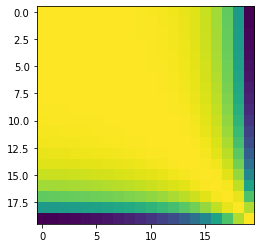

In [89]:
# plot correlation matrix:
sigma8_corr = np.corrcoef(sigma_8_samples.T)
plt.imshow(sigma8_corr)

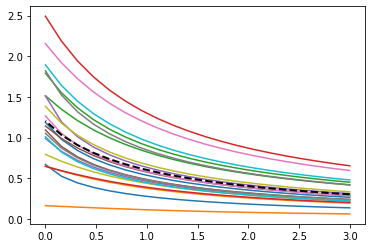

In [90]:
# plot some samples:
mean = np.mean(sigma_8_samples, axis=0)
samples_to_plot = 20
plt.plot(redshifts[::-1], mean, color='k', ls='--', lw=2., zorder=999)
for i in range(samples_to_plot):
    _ind = int(i * np.floor(sigma_8_samples.shape[0]/samples_to_plot))
    plt.plot(redshifts[::-1], sigma_8_samples[_ind, :])

(20, 20)

array([0.30337136, 0.31578239, 0.32924952, 0.343913  , 0.35993897,
       0.3775257 , 0.39691175, 0.41838673, 0.44230575, 0.46910911,
       0.4993496 , 0.53373141, 0.57316682, 0.61886174, 0.67245062,
       0.73622153, 0.81352392, 0.90960327, 1.03369316, 1.20698333])

In [92]:
pars = camb.set_params(H0=_H0, ombh2=_omegabh2, omch2=_omegach2, As=_As, ns=_ns)
pars.set_matter_power([0.0], kmax=2.0)
results = camb.get_results(pars)
print(results.get_sigma8())

[0.2235001]


In [93]:
pars = camb.set_params(H0=_H0, ombh2=_omegabh2, omch2=_omegach2, As=_As, ns=_ns)
pars.set_matter_power([3.0], kmax=2.0)
results = camb.get_results(pars)
print(results.get_sigma8())

[0.08584876]


In [8]:
matrice_sigma8 = []

#chiama camb e calcola s8
pars0 = camb.CAMBparams()
def var_da_somma(somma):
    dm = somma/1.18
    bm=dm*0.18
    return dm,bm

for i in range(100):   
    somma = np.random.uniform(0.006,1.0)
    print(var_da_somma(somma))
    
    bm, dm =var_da_somma(somma)      
    h = np.random.uniform(0.4,1.0)  
    
    #H0=67.5
    H0 = h*100
    print('H0')
    print(H0)
    ns = np.random.uniform(0.8,1.2)
    print('ns')
    print(ns)
    
    logAs = np.random.uniform(2,4)
    
    import math
    
    As=math.exp(logAs)
    print('As')
    print(As)
    from math import log
    Var_logAs=log(As)
    #cosmomc_theta = np.random.uniform(0.6,1.0)
    #z = np.linspace(0,4,100)
   
    pars0.set_cosmology(H0=H0, ombh2=bm*h**2, omch2=dm*h**2, tau=tau)
    pars0.InitPower.set_params( ns=ns)
    pars0.InitPower.set_params(As=Var_logAs)
#Note non-linear corrections couples to smaller scales than you want
    redshifts= np.linspace(0,3,20)
    
    pars0.set_matter_power(redshifts, kmax=2.0)

#Linear spectra
    pars0.NonLinear = model.NonLinear_none
    results = camb.get_results(pars0)
#kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
    s80 = np.array(results.get_sigma8())
    print(results.get_sigma8())
    matrice_sigma8.append(s80)
matrice_sigma8=np.array(matrice_sigma8) 
plt.plot(matrice_sigma8.T)
plt.title('s8(z) a diversi valori di omega matter')
plt.show()
#differenze relative o rispetto a media
#al posto di H0 cambio densità materia tenendo cost rapporto con  CDM e considero H0 squared
plt.xlabel('z');
plt.ylabel('s8');
#plt.legend(['H0 standard','H0+10%', 'H0-10%'], loc='upper left');

#salvo i risultati
#risultati =[]
#risultati.append(results.get_sigma8())
#print(risultati)
sigma8_corr=np.corrcoef(matrice_sigma8.T)
print(" ", np.shape(matrice_sigma8))
print(" ", sigma8_corr)
#import append
#results.append(s80)
#results.append(s80)
#converto results in array
#arr=[results]
#x=np.arr=[risultati]


#cov e corr su tutto
from matplotlib.colors import LogNorm
dx, dy= 0.015, 0.05
y,x = np.mgrid[slice(0.2,1.0 + dy, dy),
               slice(0.2,1.0 + dx, dx)]
z = (sigma8_corr)
z=z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
#c = plt.imshow(z, cmap ='Greens', vmin=z_min, vmax=z_max,
 #               extent =[x.min(), x.max(), y.min(), y.max()], 
  #                 interpolation = 'nearest' , origin ='lower')

c=plt.imshow(z)
plt.colorbar(c)
plt.show()
#print(risultati)


(0.34594424013862063, 0.06226996322495171)
H0
40.13709491882468
ns
0.9297972772124635
As
11.325832135808081
Note: redshifts have been re-sorted (earliest first)


CAMBError: Lensing requires a realistically normalized spectrum, you have P(k=0.05/Mpc) > 2e-8